In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Camera calibration

Camera calibration is accomplished by load the chessboard images at `images/calibration` and running their grayscaled versions through `cv2.findChessboardCorners`. Corners (`imgpoints`) and chessboard coordinates (`objpoints`) for each image are calculated and saved to a pickle file.

The camera is calibrated passing the `imgpoints` and `objpoints` to `cv2.calibrateCamera` which returns the distortion coefficiants necessary to undistort and image. Finally, `cv2.undistort` can now be used to undistort any image taken with this camera.

#### Detected corners on the chessboard images

These images show the corners that `cv2.findChessboardCorners` detected. As you can see, OpenCV was not able to detect the chessboard corners on all of the images.

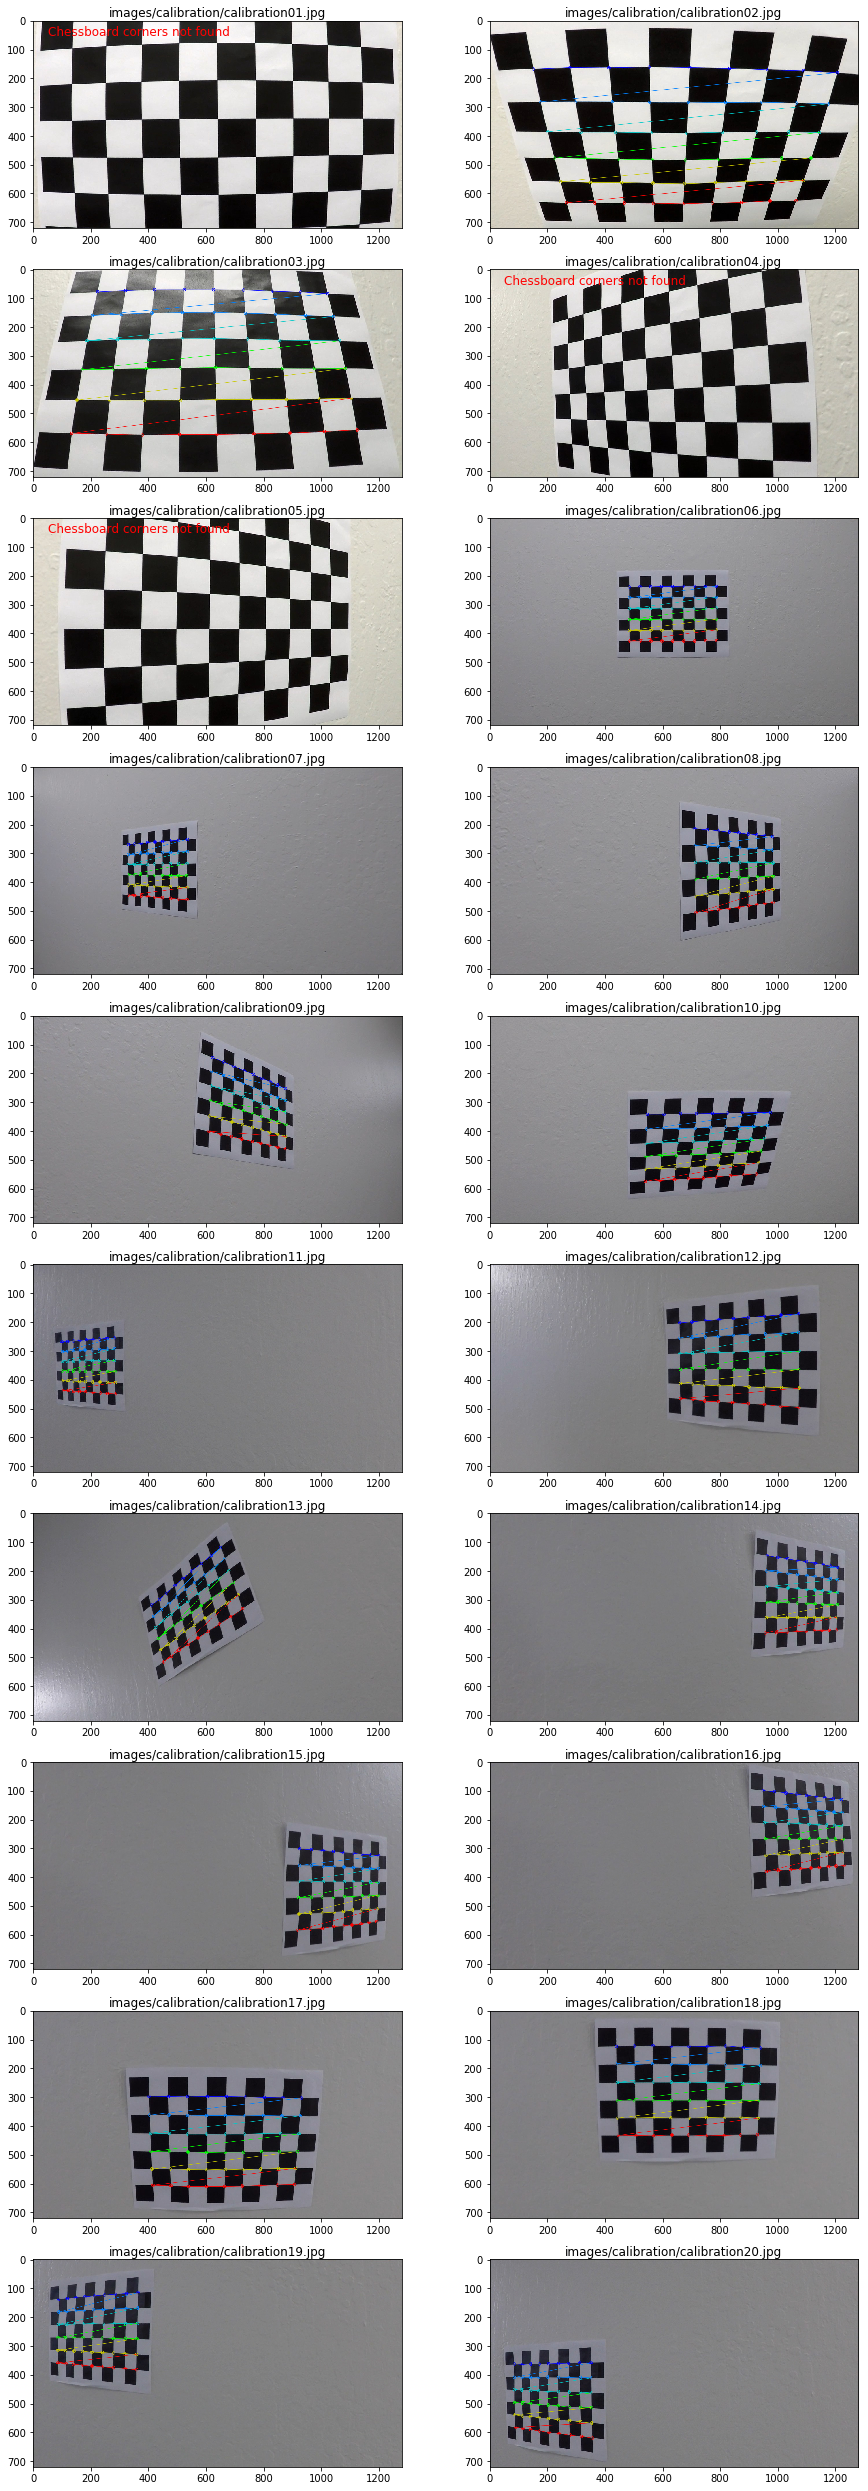

In [29]:
# %load calibrate.py
import glob
import scipy.misc
import cv2
from chessboard import calculate_image_chessboard_points, save_chessboard_points, draw_chessboard_corners, ChessboardImagesPlot
from convert import rgb_image

def calibrate(glob, chessboard_shape):
    show_images = True
    objpoints = []
    imgpoints = []
    plot = ChessboardImagesPlot(rows=10, cols=2, figsize=(15,45))
    shape = rgb_image(images_glob[0]).shape[1::-1]


    for i, filepath in enumerate(images_glob):
        img = rgb_image(filepath)
        pattern_was_found, objp, corners = calculate_image_chessboard_points(img, chessboard_shape)

        if pattern_was_found:
            img = draw_chessboard_corners(img, chessboard_shape, corners)

        if show_images:
            plot.plot_image(pattern_was_found, filepath, img)

        if pattern_was_found:
            objpoints.append(objp)
            imgpoints.append(corners)

    if show_images:
        plot.show()

    # save_file = "chessboard_points.pkl"
    # save_chessboard_points(save_file, objpoints, imgpoints)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, shape, None, None)


if __name__ == "__main__":
    images_glob = glob.glob("images/calibration/calibration*.jpg")
    chessboard_shape = (9, 6)
    calibrate(images_glob, chessboard_shape)
